# Regression End-to-End Notebook
--------
In this notebook, we will make an E2E project using Airline Tickets dataset, and using different methods we covered in the previous notebooks

## 1. Importing needed modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

## 2. Reading Dataset

In [3]:
df = pd.read_csv('Data/Airline_Train.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## 3. Data Analysis

In [4]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
# only on price, because not pandas "object"
df.describe(include=['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

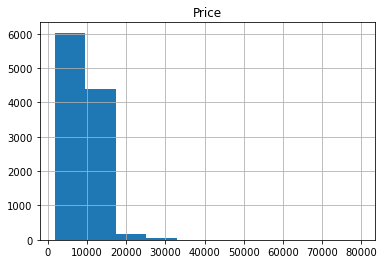

In [5]:
df.hist()

In [6]:
# for col_name in df.columns:
#     plt.hist(df[col_name])
#     plt.title(col_name + ' Histogram')
#     plt.xticks(rotation='vertical')
#     plt.show()

## 4. Data Cleaning
------
**VERY IMPORTANT NOTE!!**

I will apply all the data cleaning steps in seperate cells, with showing the updated df step by step

THEN, I will make one huge function called data_cleaning that would do all these steps at once

In the end, you could delete all the seperate cells, and just leave the one with the function

In [7]:
df = df.drop('Route', axis='columns', errors='ignore')
df = df.replace('nan', np.NaN)
df = df.dropna()
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
df = df.drop(['Dep_Time', "Arrival_Time", "Additional_Info"], axis='columns', errors='ignore')
df

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,2h 40m,non-stop,12648


In [9]:
# Date of Journey fix
year_list = []
month_list = []

def split_date(x):
    # x = 25/03/2019 for example
    index = x.find('/')
    month = int(x[index+1:index+3])
    month_list.append(month)
    
    x = x[index+1:]
    index = x.find('/')
    year = int(x[index+1:index+5])
    year_list.append(year)

df.Date_of_Journey.apply(split_date)
print(len(year_list))
print(len(month_list))

10682
10682


In [10]:
df = df.drop('Date_of_Journey', axis='columns', errors='ignore')
new_df = pd.DataFrame({'Year': year_list, 'Month': month_list})
df = df.merge(new_df, left_index=True, right_index=True)
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Year,Month
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,2019,3
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,2019,5
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,2019,6
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,2019,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,2019,3
...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,2h 40m,non-stop,3257,2019,4
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,2019,4
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,2019,4
10680,Jet Airways,Banglore,Delhi,3h,non-stop,7229,2019,3


In [11]:
# This function converted df.Duration to seconds, then we divided it by 60 to convert it to minutes
df.Duration = pd.to_timedelta(df["Duration"]).dt.seconds // 60
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Year,Month
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,2019,3
1,Air India,Kolkata,Banglore,445,2 stops,7662,2019,5
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,2019,6
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,2019,5
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,2019,3
...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,160,non-stop,3257,2019,4
10678,Air Asia,Kolkata,Banglore,150,non-stop,4107,2019,4
10679,Air India,Kolkata,Banglore,155,non-stop,4145,2019,4
10680,Jet Airways,Banglore,Delhi,180,non-stop,7229,2019,3


In [12]:
def replace_stops(x):
    if x == 'non-stop':
        return 0
    if x == '2 stops':
        return 2
    if x == '1 stop':
        return 1
    if x == '3 stops':
        return 3
    if x == '4 stops':
        return 4

df.Total_Stops = df.Total_Stops.apply(replace_stops)
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Year,Month
0,IndiGo,Banglore,New Delhi,170,0,3897,2019,3
1,Air India,Kolkata,Banglore,445,2,7662,2019,5
2,Jet Airways,Delhi,Cochin,1140,2,13882,2019,6
3,IndiGo,Kolkata,Banglore,325,1,6218,2019,5
4,IndiGo,Banglore,New Delhi,285,1,13302,2019,3
...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,160,0,3257,2019,4
10678,Air Asia,Kolkata,Banglore,150,0,4107,2019,4
10679,Air India,Kolkata,Banglore,155,0,4145,2019,4
10680,Jet Airways,Banglore,Delhi,180,0,7229,2019,3


In [13]:
airline_uniques = pd.unique(df.Airline)

airline_map = {}

for i, un in enumerate(airline_uniques):
    airline_map[un] = i
    
def replace_airline(x):
    return airline_map[x]

df.Airline = df.Airline.apply(replace_airline)
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Year,Month
0,0,Banglore,New Delhi,170,0,3897,2019,3
1,1,Kolkata,Banglore,445,2,7662,2019,5
2,2,Delhi,Cochin,1140,2,13882,2019,6
3,0,Kolkata,Banglore,325,1,6218,2019,5
4,0,Banglore,New Delhi,285,1,13302,2019,3
...,...,...,...,...,...,...,...,...
10677,3,Banglore,Delhi,160,0,3257,2019,4
10678,7,Kolkata,Banglore,150,0,4107,2019,4
10679,1,Kolkata,Banglore,155,0,4145,2019,4
10680,2,Banglore,Delhi,180,0,7229,2019,3


In [14]:
df = pd.get_dummies(df, columns=['Source', 'Destination'], prefix=['Source', 'Destination'])
df

,Airline,Duration,Total_Stops,Price,Year,Month,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,170,0,3897,2019,3,1,0,0,0,0,0,0,0,0,0,1
1,1,445,2,7662,2019,5,0,0,0,1,0,1,0,0,0,0,0
2,2,1140,2,13882,2019,6,0,0,1,0,0,0,1,0,0,0,0
3,0,325,1,6218,2019,5,0,0,0,1,0,1,0,0,0,0,0
4,0,285,1,13302,2019,3,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,3,160,0,3257,2019,4,1,0,0,0,0,0,0,1,0,0,0
10678,7,150,0,4107,2019,4,0,0,0,1,0,1,0,0,0,0,0
10679,1,155,0,4145,2019,4,0,0,0,1,0,1,0,0,0,0,0
10680,2,180,0,7229,2019,3,1,0,0,0,0,0,0,1,0,0,0


In [15]:
df.dtypes

Airline                  int64
Duration                 int64
Total_Stops              int64
Price                    int64
Year                     int64
Month                    int64
Source_Banglore          uint8
Source_Chennai           uint8
Source_Delhi             uint8
Source_Kolkata           uint8
Source_Mumbai            uint8
Destination_Banglore     uint8
Destination_Cochin       uint8
Destination_Delhi        uint8
Destination_Hyderabad    uint8
Destination_Kolkata      uint8
Destination_New Delhi    uint8
dtype: object

In [16]:
def data_cleaning(df):
    df = df.drop('Route', axis='columns', errors='ignore')
    df = df.replace('nan', np.NaN)
    df = df.dropna()
    df = df.drop(['Dep_Time', "Arrival_Time", "Additional_Info"], axis='columns', errors='ignore')
    
    year_list = []
    month_list = []

    def split_date(x):
        # x = 25/03/2019 for example
        index = x.find('/')
        month = int(x[index+1:index+3])
        month_list.append(month)

        x = x[index+1:]
        index = x.find('/')
        year = int(x[index+1:index+5])
        year_list.append(year)

    df.Date_of_Journey.apply(split_date)
    
    df = df.drop('Date_of_Journey', axis='columns', errors='ignore')
    new_df = pd.DataFrame({'Year': year_list, 'Month': month_list})
    df = df.merge(new_df, left_index=True, right_index=True)
    
    df.Duration = pd.to_timedelta(df["Duration"]).dt.seconds // 60
    
    def replace_stops(x):
        if x == 'non-stop':
            return 0
        if x == '2 stops':
            return 2
        if x == '1 stop':
            return 1
        if x == '3 stops':
            return 3
        if x == '4 stops':
            return 4

    df.Total_Stops = df.Total_Stops.apply(replace_stops)
    
    airline_uniques = pd.unique(df.Airline)

    airline_map = {}

    for i, un in enumerate(airline_uniques):
        airline_map[un] = i

    def replace_airline(x):
        return airline_map[x]

    df.Airline = df.Airline.apply(replace_airline)
    
    df = pd.get_dummies(df, columns=['Source', 'Destination'], prefix=['Source', 'Destination'])
    
    return df

In [17]:
df = pd.read_csv('Data/Airline_Train.csv')
df = data_cleaning(df)
print(df.dtypes)
df

Airline                  int64
Duration                 int64
Total_Stops              int64
Price                    int64
Year                     int64
Month                    int64
Source_Banglore          uint8
Source_Chennai           uint8
Source_Delhi             uint8
Source_Kolkata           uint8
Source_Mumbai            uint8
Destination_Banglore     uint8
Destination_Cochin       uint8
Destination_Delhi        uint8
Destination_Hyderabad    uint8
Destination_Kolkata      uint8
Destination_New Delhi    uint8
dtype: object


,Airline,Duration,Total_Stops,Price,Year,Month,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,170,0,3897,2019,3,1,0,0,0,0,0,0,0,0,0,1
1,1,445,2,7662,2019,5,0,0,0,1,0,1,0,0,0,0,0
2,2,1140,2,13882,2019,6,0,0,1,0,0,0,1,0,0,0,0
3,0,325,1,6218,2019,5,0,0,0,1,0,1,0,0,0,0,0
4,0,285,1,13302,2019,3,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,3,160,0,3257,2019,4,1,0,0,0,0,0,0,1,0,0,0
10678,7,150,0,4107,2019,4,0,0,0,1,0,1,0,0,0,0,0
10679,1,155,0,4145,2019,4,0,0,0,1,0,1,0,0,0,0,0
10680,2,180,0,7229,2019,3,1,0,0,0,0,0,0,1,0,0,0


## 5. Data Splitting
In case we wouldn't use cross validation

In [18]:
y = df['Price']
X = df.drop('Price', axis=1)
X

,Airline,Duration,Total_Stops,Year,Month,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,170,0,2019,3,1,0,0,0,0,0,0,0,0,0,1
1,1,445,2,2019,5,0,0,0,1,0,1,0,0,0,0,0
2,2,1140,2,2019,6,0,0,1,0,0,0,1,0,0,0,0
3,0,325,1,2019,5,0,0,0,1,0,1,0,0,0,0,0
4,0,285,1,2019,3,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,3,160,0,2019,4,1,0,0,0,0,0,0,1,0,0,0
10678,7,150,0,2019,4,0,0,0,1,0,1,0,0,0,0,0
10679,1,155,0,2019,4,0,0,0,1,0,1,0,0,0,0,0
10680,2,180,0,2019,3,1,0,0,0,0,0,0,1,0,0,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8544, 16)
(2137, 16)
(8544,)
(2137,)


In [20]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

y_train = np.expand_dims(y_train, 1)
y_test = np.expand_dims(y_test, 1)

sc_Y = StandardScaler()
y_train = sc_Y.fit_transform(y_train)
y_test = sc_Y.transform(y_test)

## 6. Model Building
----
Choices are:
- Multilinear Regression
- Lasso, Ridge Regularized Linear Regression
- Polynomial Regression
- Decision Tree Regression
- Random Forest Regreession

In [21]:
model1 = LinearRegression()
model1 = model1.fit(X_train, y_train)

model2 = Lasso()
model2 = model2.fit(X_train, y_train)

model3 = Ridge()
model3 = model3.fit(X_train, y_train)

model4 = DecisionTreeRegressor()
model4 = model4.fit(X_train, y_train)

model5 = RandomForestRegressor()
model5 = model5.fit(X_train, y_train)

poly_transform1 = PolynomialFeatures(degree=2)
X_poly = poly_transform1.fit_transform(X_train)
model6 = LinearRegression()
model6 = model6.fit(X_poly, y_train)

poly_transform2 = PolynomialFeatures(degree=3)
X_poly = poly_transform2.fit_transform(X_train)
model7 = LinearRegression()
model7 = model7.fit(X_poly, y_train)

C:\Users\RADWAK~1\AppData\Local\Temp/ipykernel_5608/2732047876.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model5 = model5.fit(X_train, y_train)


In [22]:
ypred1 = model1.predict(X_test)
ypred2 = model2.predict(X_test)
ypred3 = model3.predict(X_test)
ypred4 = model4.predict(X_test)
ypred5 = model5.predict(X_test)

X_test_poly = poly_transform1.transform(X_test)
ypred6 = model6.predict(X_test_poly)

X_test_poly = poly_transform2.transform(X_test)
ypred7 = model7.predict(X_test_poly)

## 7. 1st Evaluation using RMSE (like Kaggle) 

In [23]:
print('Linear Regression RMSE = %.5f' % mean_squared_error(y_test, ypred1, squared=True))
print('Lasso Regression RMSE = %.5f' % mean_squared_error(y_test, ypred2, squared=True))
print('Ridge Regression RMSE = %.5f' % mean_squared_error(y_test, ypred3, squared=True))
print('Decision Tree RMSE = %.5f' % mean_squared_error(y_test, ypred4, squared=True))
print('Random Forest RMSE = %.5f' % mean_squared_error(y_test, ypred5, squared=True))
print('Polynomial 2nd degree RMSE = %.5f' % mean_squared_error(y_test, ypred6, squared=True))
print('Polynomial 3rd degree RMSE = %.5f' % mean_squared_error(y_test, ypred7, squared=True))

Linear Regression RMSE = 0.54790
Lasso Regression RMSE = 0.96286
Ridge Regression RMSE = 0.54791
Decision Tree RMSE = 0.43325
Random Forest RMSE = 0.38940
Polynomial 2nd degree RMSE = 0.48786
Polynomial 3rd degree RMSE = 0.43242


### Optimization Methods:
- Grid Search
- Cross Validation

## 8. Cross Validation using KFold

In [24]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [25]:
model1 = LinearRegression()
model1 = model1.fit(X, y)

model2 = Lasso()
model2 = model2.fit(X, y)

model3 = Ridge()
model3 = model3.fit(X, y)

model4 = DecisionTreeRegressor()
model4 = model4.fit(X, y)

model5 = RandomForestRegressor()
model5 = model5.fit(X, y)

poly_transform1 = PolynomialFeatures(degree=2)
X_poly = poly_transform1.fit_transform(X)
model6 = LinearRegression()
model6 = model6.fit(X_poly, y)

poly_transform2 = PolynomialFeatures(degree=3)
X_poly = poly_transform2.fit_transform(X)
model7 = LinearRegression()
model7 = model7.fit(X_poly, y)

## 9. Re-evaluation

In [26]:
result1 = cross_val_score(model1, X, y, cv=KFold(10))
result2 = cross_val_score(model2, X, y, cv=KFold(10))
result3 = cross_val_score(model3, X, y, cv=KFold(10))
result4 = cross_val_score(model4, X, y, cv=KFold(10))
result5 = cross_val_score(model5, X, y, cv=KFold(10))
result6 = cross_val_score(model6, X, y, cv=KFold(10))
result7 = cross_val_score(model7, X, y, cv=KFold(10))

In [27]:
print('Linear Regression Accuracy = %.2f%%' % (result1.mean() * 100))
print('Lasso Regression Accuracy = %.2f%%' % (result2.mean() * 100))
print('Ridge Regression Accuracy = %.2f%%' % (result3.mean() * 100))
print('Decision Tree Accuracy = %.2f%%' % (result4.mean() * 100))
print('Random Forest Accuracy = %.2f%%' % (result5.mean() * 100))
print('Polynomial 2nd degree Accuracy = %.2f%%' % (result6.mean() * 100))
print('Polynomial 3rd degree Accuracy = %.2f%%' % (result7.mean() * 100))

Linear Regression Accuracy = 43.14%
Lasso Regression Accuracy = 43.13%
Ridge Regression Accuracy = 43.13%
Decision Tree Accuracy = 55.97%
Random Forest Accuracy = 61.13%
Polynomial 2nd degree Accuracy = 43.14%
Polynomial 3rd degree Accuracy = 43.14%


## 10. Grid Search

In [28]:
# Applying Grid Search on Decision Tree:
max_depth_options = [2, 3, 4, None]
grid1 = GridSearchCV(estimator=DecisionTreeRegressor(), cv=10, param_grid=dict(max_depth=max_depth_options))
grid1 = grid1.fit(X, y)

# Random Forest
max_depth_options = [2, 3, 4, None]
grid2 = GridSearchCV(estimator=RandomForestRegressor(), cv=10, param_grid=dict(max_depth=max_depth_options))
grid2 = grid2.fit(X, y)

## 11. Re-evalution

In [29]:
print("Grid 1 best score: %.2f%%" % (grid1.best_score_ * 100))
print("Grid 2 best score: %.2f%%" % (grid2.best_score_ * 100))

Grid 1 best score: 56.24%
Grid 2 best score: 61.20%


## 12. Testing on test dataset

In [30]:
df2 = pd.read_csv('Data/Airline_Test.csv')
df2 = data_cleaning(df2)
df2

,Airline,Duration,Total_Stops,Year,Month,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,655,1,2019,6,0,0,1,0,0,0,1,0,0,0,0
1,1,240,1,2019,5,0,0,0,1,0,1,0,0,0,0,0
2,0,1425,1,2019,5,0,0,1,0,0,0,1,0,0,0,0
3,2,780,1,2019,5,0,0,1,0,0,0,1,0,0,0,0
4,3,170,0,2019,6,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,4,1435,1,2019,6,0,0,0,1,0,1,0,0,0,0,0
2667,1,155,0,2019,3,0,0,0,1,0,1,0,0,0,0,0
2668,0,395,1,2019,3,0,0,1,0,0,0,1,0,0,0,0
2669,4,915,1,2019,3,0,0,1,0,0,0,1,0,0,0,0


In [31]:
sc_X = StandardScaler()
df2 = sc_X.fit_transform(df2)
df2.shape

(2671, 16)

In [32]:
y_pred = model5.predict(df2)
y_pred

array([ 6497.15382143,  8900.80095238,  8159.89284019, ...,
       11159.51740476, 11053.848193  , 11972.94775524])